# __Search OOO by OOO__

- Tutorial Difficulty: {★☆☆☆☆}
- {0} min read
- Languages: [SQL](https://en.wikipedia.org/wiki/SQL) (100%)
- File location: tutorial_en/thanosql_search/{file name}.ipynb
- References: [Dataset](download link for the dataset), [Reference](Paper, article, or post link)

## Tutorial Introduction

<div class="admonition note">
    <h4 class="admonition-title">Understanding OOO</h4>
    <p>Write a description of the concept related to the model. (e.g.) Explain For computers to understand human language, it must be vectorized. Recently, studies on pre-built models such as <a href="https://en.wikipedia.org/wiki/BERT_(language_model)">BERT</a> and <a href="https://en.wikipedia.org/wiki/GPT-3">GPT-3</a> have been actively carried out, showing remarkable results. These models identify the meaning of each sentence based on <a href="https://en.wikipedia.org/wiki/Self-supervised_learning">Self-Supervised Learning</a>, and sentences with similar meanings are vectorized and placed close to each other in a low-dimensional space. Self-supervised learning allows learning without labeling by determining whether each sentence/context is true/false. It randomly shuffles the order between sentences or masks some words.</p>
</div>

If additional explanation is required, please write it as needed.

(e.g.) The handling of different forms of input, such as texts and images, together is called multi-modal. "**CLIP: Connecting Text and Image**" utilizes a multi-modal model to understand low-dimensional vectors. While previous models only trained <a href="https://en.wikipedia.org/wiki/Feature_(machine_learning)">features</a> of the image, the multi-modal model can train both images and texts. It can even learn the features of the texts that describe the images. In addition, by placing texts and images together in a low-dimensional space, the similarity between texts and images can be calculated. From this, a search algorithm can be derived.

__The following are examples and applications of the ThanoSQL OOO search algorithm.__

- Write two or three examples and applications of the given ThanoSQL model
- (e.g.) Find similar images within an album containing thousands of photos.
- (e.g.) Store your images in the ThanoSQL's database and create your own search engine or machine learning model utilizing the ThanoSQL Auto-ML regression/classification model.

<div class="admonition note">
    <h4 class="admonition-title">In This Tutorial</h4>
    <p>👉 Write a description of the tutorial.</p>
</div>

<div class="admonition tip">
    <h4 class="admonition-title">(Optional)Dataset Description</h4>
    <p>Write additional dataset descriptions if needed. This can be skipped.</p>
</div>

If additional explanation is required, please write it as needed. (e.g.) Create a model that uses ThanoSQL to input handwriting data and retrieves similar images from the database.

## __0. Prepare Dataset__

As mentioned in the [ThanoSQL Workspace](https://docs.thanosql.ai/en/getting_started/how_to_use_ThanoSQL/#5-thanosql-workspace), you must create an API token and run the query below to execute the query of ThanoSQL.

(or) (If there is pre-built model)

## __0. Prepare Dataset and Model__

As mentioned in the [ThanoSQL Workspace](https://docs.thanosql.ai/en/getting_started/how_to_use_ThanoSQL/#5-thanosql-workspace), you must create an API token and run the query below to execute the query of ThanoSQL.

In [ ]:
%load_ext thanosql
%thanosql API_TOKEN=<Issued_API_TOKEN>

### __Prepare Dataset__

In [2]:
%%thanosql
GET THANOSQL DATASET {dataset}
OPTIONS (overwrite=True)

Success


<div class="admonition note">
    <h4 class="admonition-title">Query Details</h4>
    <ul>
        <li>"<strong>GET THANOSQL DATASET</strong>" downloads the specified dataset to the workspace.</li>
        <li>"<strong>OPTIONS</strong>" specifies the option values to be used for the <strong>GET THANOSQL DATASET</strong> clause.
        <ul>
            <li>"overwrite": determines whether to overwrite a dataset if it already exists. If set as True, the old dataset is replaced with the new dataset (bool, optional, True|False, default: False)</li>
        </ul>
        </li>
    </ul>
</div>

In [3]:
%%thanosql
COPY {table name}
OPTIONS (overwrite=True)
FROM 'location of csv file'

Success


In [4]:
(e.g.)
%%thanosql
COPY mnist_test
OPTIONS (overwrite=True)
FROM 'thanosql-dataset/mnist_data/mnist_test.csv'

Success


<div class="admonition note">
    <h4 class="admonition-title">Query Details</h4>
    <ul>
        <li>"<strong>COPY</strong>" specifies the name of the dataset to be saved as a database table.</li>
        <li>"<strong>OPTIONS</strong>" specifies the option values to be used for the <strong>COPY</strong> clause.
        <ul>
           <li>"overwrite": determines whether to overwrite a table if it already exists. If set as True, the old table is replaced with the new table (bool, optional, True|False, default: False)</li>
        </ul>
        </li>
    </ul>
</div>

#### (If there is pre-built model)

### __Prepare the Model__

In [4]:
%%thanosql
GET THANOSQL MODEL {model name}
OPTIONS (
    model_name='tutorial_search_modelname',
    overwrite=True
    )

Success


<div class="admonition note">
    <h4 class="admonition-title">Query Details</h4>
    <ul>
        <li>"<strong>GET THANOSQL MODEL</strong>" downloads the specified model to the workspace.</li>
        <li>"<strong>OPTIONS</strong>" specifies the option values to be used for the <strong>GET THANOSQL MODEL</strong> clause.
        <ul>
            <li>"model_name": the model name to store a given model in the ThanoSQL workspace (str, optional)</li>
            <li>"overwrite": determines whether to overwrite a model if it already exists. If set as True, the old model is replaced with the new model (bool, optional, True|False, default: False)</li>
        </ul>
        </li>
    </ul>
</div>

## __1. Check Dataset__

To create a(the) OOO search model, we use the __{table name}__ table located in the ThanoSQL workspace database. Run the query below to check the contents of the table.

(or) (if BUILD doesn't support)

## __1. Check Dataset__

For this tutorial, we use the __{table name}__ table located in the ThanoSQL workspace database. Run the query below to check the contents of the table.

In [5]:
%%thanosql
SELECT *
FROM {table name}
LIMIT 5

,photo_id,image_path,photo_image_url,photo_description,ai_description
0,XMyPniM9LF0,thanosql-dataset/unsplash_data/XMyPniM9LF0.jpg,https://images.unsplash.com/uploads/1411949294...,Woman exploring a forest,woman walking in the middle of forest
1,rDLBArZUl1c,thanosql-dataset/unsplash_data/rDLBArZUl1c.jpg,https://images.unsplash.com/photo-141633941111...,Succulents in a terrarium,succulent plants in clear glass terrarium
2,cNDGZ2sQ3Bo,thanosql-dataset/unsplash_data/cNDGZ2sQ3Bo.jpg,https://images.unsplash.com/photo-142014251503...,Rural winter mountainside,rocky mountain under gray sky at daytime
3,iuZ_D1eoq9k,thanosql-dataset/unsplash_data/iuZ_D1eoq9k.jpg,https://images.unsplash.com/photo-141487280988...,Poppy seeds and flowers,red common poppy flower selective focus phography
4,BeD3vjQ8SI0,thanosql-dataset/unsplash_data/BeD3vjQ8SI0.jpg,https://images.unsplash.com/photo-141700759404...,Silhouette near dark trees,trees during night time


<div class="admonition note">
    <h4 class="admonition-title">Understanding the Data Table</h4>
    <p><strong>{table name}</strong> table contains the following information.</p>
    <ul>
        <li>{column name}: column description</li>
        <li>(e.g.) image_path: the name of the column that stores the image path</li>
    </ul>
</div>

## __2. Build a OOO Model__

To create a OOO model with the name <strong>{model name}</strong> using the <strong>{table name}</strong> table, run the following query.\
(Estimated duration of query execution: {0} min)

(or) (if BUILD doesn't support)

## __2. Convert Using a Pre-built Model__

(Skip Description about BUILD, move to `To vectorize the {dataset} OOO run the following "__CONVERT USING__" query.` cell)

In [6]:
%%thanosql
BUILD MODEL {model name}
USING {base model name}
OPTIONS (
    options_needed=add,
    overwrite=True
    )
AS
SELECT *
FROM {table name}

Success


<div class="admonition note">
    <h4 class="admonition-title">Query Details</h4>
    <ul>
        <li>"<strong>BUILD MODEL</strong>" creates and trains a model named <strong>{model name}</strong>.</li>
        <li>"<strong>USING</strong>" specifies <strong>{base model name}</strong> as the base model.</li>
        <li>"<strong>OPTIONS</strong>" specifies the option values used to create the model.
        <ul>
            <li>(e.g.) "image_col": the name of the column containing the image path (str, default: 'image_path')</li>
            <li>(e.g.) "max_epochs": number of times to train with the training dataset (int, optional, default: 5)</li>
            <li>"overwrite": determines whether to overwrite a model if it already exists. If set as True, the old model is replaced with the new model (bool, optional, True|False, default: False) </li>
        </ul>
        </li>
    </ul>
</div>

To vectorize the {dataset} OOO run the following "__CONVERT USING__" query. The vectorized results are stored in a user-defined column(default: convert_result) in the __{table name}__ table.

In [ ]:
%%thanosql
CONVERT USING {model name}
OPTIONS (
    (e.g.) table_name= 'mnist_test',
    (e.g.) image_col='image_path',
    (e.g.) result_col='convert_result'
    )
AS
SELECT *
FROM {table name}

<div class="admonition note">
    <h4 class="admonition-title">Query Details</h4>
    <ul>
        <li>"<strong>CONVERT USING</strong>" uses <strong>{model name}</strong> as an algorithm for OOO vectorizaion.</li>
        <li>"<strong>OPTIONS</strong>" specifies the options to be used for OOO vectorization.
        <ul>
            <li>(e.g.) "table_name": the table name to be stored in the ThanoSQL workspace database. If a previously used table is specified, the existing table will be replaced by the new table with a 'convert_result' column (str, optional)</li>
            <li>(e.g.) "image_col": the name of the column containing the image path (str, default: 'image_path')</li>
            <li>(e.g.) "result_col": defines the column name that contains the vectorized results (str, optional, default: 'convert_result')</li>
        </ul>
        </li>
    </ul>
</div>

## __3. Search__

Write a description about searching using the model.

In [8]:
%%thanosql
SEARCH {data type}
USING {model name}
OPTIONS (
    search_by='text',
    search_input='a black cat',
    emb_col='convert_result',
    result_col='search_result'
    )
AS
SELECT *
FROM {table name}

,photo_id,image_path,photo_image_url,photo_description,ai_description,convert_result,search_result
0,XMyPniM9LF0,thanosql-dataset/unsplash_data/XMyPniM9LF0.jpg,https://images.unsplash.com/uploads/1411949294...,Woman exploring a forest,woman walking in the middle of forest,"[-0.17420606, 0.6450801, 0.13915274, 0.1034161...",0.185742
1,rDLBArZUl1c,thanosql-dataset/unsplash_data/rDLBArZUl1c.jpg,https://images.unsplash.com/photo-141633941111...,Succulents in a terrarium,succulent plants in clear glass terrarium,"[-0.372485, 0.338373, -0.07027413, 0.14057255,...",0.148483
2,cNDGZ2sQ3Bo,thanosql-dataset/unsplash_data/cNDGZ2sQ3Bo.jpg,https://images.unsplash.com/photo-142014251503...,Rural winter mountainside,rocky mountain under gray sky at daytime,"[-0.35936344, 0.61205083, 0.15280452, 0.191684...",0.187674
3,iuZ_D1eoq9k,thanosql-dataset/unsplash_data/iuZ_D1eoq9k.jpg,https://images.unsplash.com/photo-141487280988...,Poppy seeds and flowers,red common poppy flower selective focus phography,"[0.021213964, 0.116503514, -0.22624841, -0.433...",0.177507
4,BeD3vjQ8SI0,thanosql-dataset/unsplash_data/BeD3vjQ8SI0.jpg,https://images.unsplash.com/photo-141700759404...,Silhouette near dark trees,trees during night time,"[-0.26645434, 0.15451586, -0.022570107, -0.074...",0.218851
...,...,...,...,...,...,...,...
24963,c7OrOMxrurA,thanosql-dataset/unsplash_data/c7OrOMxrurA.jpg,https://images.unsplash.com/photo-159300793778...,None,black metal fence during daytime,"[-0.13440062, -0.025392912, -0.12282352, -0.33...",0.226361
24964,15IuQ5a0Qwg,thanosql-dataset/unsplash_data/15IuQ5a0Qwg.jpg,https://images.unsplash.com/photo-159296761254...,Pearl earrings and seashells,white and brown seashell on white surface,"[-0.31456038, 0.5623393, 0.171072, -0.20321381...",0.147183
24965,w8nrcXz8pwk,thanosql-dataset/unsplash_data/w8nrcXz8pwk.jpg,https://images.unsplash.com/photo-159299937329...,None,leopard on brown tree trunk during daytime,"[0.07346563, -0.3390117, -0.14695388, -0.42601...",0.227299
24966,n1jHrRhehUI,thanosql-dataset/unsplash_data/n1jHrRhehUI.jpg,https://images.unsplash.com/photo-159192792878...,Floral truck in the streets of Rome,woman in beige coat and white hat standing on ...,"[0.055300977, -0.015219223, 0.26629472, -0.364...",0.169794


<div class="admonition note">
    <h4 class="admonition-title">Query Details</h4>
    <ul>
        <li>"<strong>SEARCH OOO [image|text|audio|video]</strong>" defines the image|text|audio|video file type to search for.</li>
        <li>"<strong>USING</strong>" defines the model used for OOO vectorization.</li>
        <li>"<strong>OPTIONS</strong>" specifies the options to be used for OOO searching.
        <ul>
            <li>"search_by": defines the image|text|audio|video type to be used for the search (str)</li>
            <li>"search_input": defines the input to be used for the search (str)</li>
            <li>"emb_col": the column that contains the vectorized results (str)</li>
            <li>"result_col": defines the name of the column that contains the search results (str, optional, default: 'search_result')</li>
        </ul>
        </li>
        <li>"<strong>AS</strong>" defines the embedding table to be used for searches. In this example, the <strong>{table name}</strong> table is used.</li>
    </ul>
</div>

(Print result using PRINT if possible)

(e.g.) To output the "__SEARCH__" result using the "__PRINT__" clause to output the top four most similar images, run the following query.

/home/jovyan/thanosql-dataset/unsplash_data/UMyfDjQ6Ep8.jpg


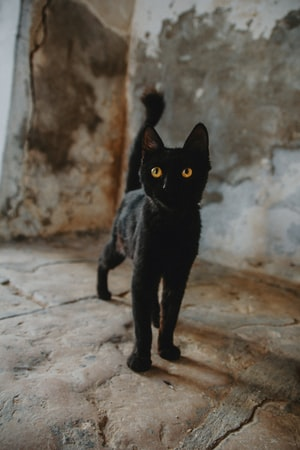

/home/jovyan/thanosql-dataset/unsplash_data/7XJ3d0xK444.jpg


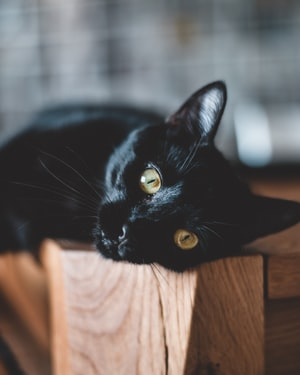

/home/jovyan/thanosql-dataset/unsplash_data/m8HsSWh-y6E.jpg


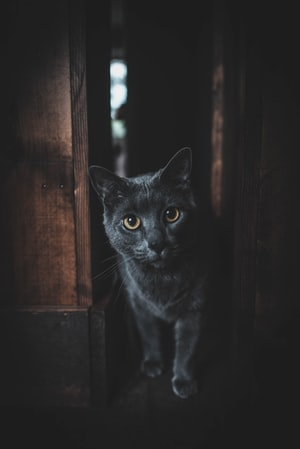

/home/jovyan/thanosql-dataset/unsplash_data/6ST6S6i9IGM.jpg


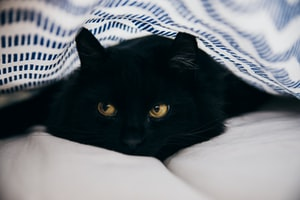

/home/jovyan/thanosql-dataset/unsplash_data/aFyD5aWKu6k.jpg


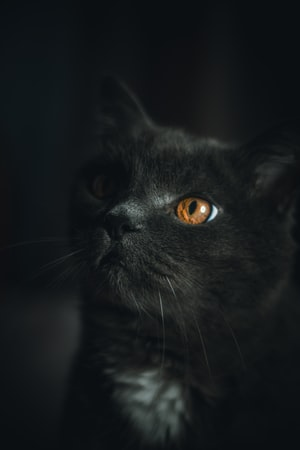

In [10]:
(e.g.)
%%thanosql
PRINT IMAGE
AS (
    SELECT image_path, search_result
    FROM (
        SEARCH IMAGE
        USING tutorial_search_clip
        OPTIONS (
            search_by='text',
            search_input='a black cat',
            emb_col='convert_result',
            result_col='search_result'
            )
        AS
        SELECT *
        FROM unsplash_data
        )
    ORDER BY search_result DESC
    LIMIT 5
    )

## __4. In Conclusion__

Write summary & conclusion of the tutorial.

* [How to Upload My Data to the ThanoSQL Workspace](https://docs.thanosql.ai/en/getting_started/data_upload/)
* [How to Create a Table Using My Data](https://docs.thanosql.ai/en/how-to_guides/ThanoSQL_query/COPY_SYNTAX/)
* [How to Upload My Model to the ThanoSQL Workspace](https://docs.thanosql.ai/en/how-to_guides/ThanoSQL_query/UPLOAD_SYNTAX/)

<div class="admonition tip">
    <h4 class="admonition-title">Inquiries About Deploying a Model for Your Own Service</h4>
    <p>If you have any difficulties creating your own model using ThanoSQL or applying it to your services, please feel free to contact us below😊</p>
    <p>For inquiries regarding building OOO search models: <a href="mailto:contact@smartmind.team">contact@smartmind.team</a></p>
</div>